In [1]:
%pylab inline
import gdr2_completeness.tap_queries as tap
import gdr2_completeness.data_manipulation as dr2
from healpy.visufunc import projplot

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Preparing an array of gmags, grpmags and galactic longitudes and latitudes
l = np.zeros(49152)
b = np.zeros_like(l)
gmag = 12.5 * np.ones_like(l)
grpmag = 12.0 * np.ones_like(l)

# A utility function that calculates l and b values from level 6 HEALpix numbers 
l,b = dr2.hpx2lb(np.arange(49152))

In [3]:
# Initialising the selection function. Using 'from_rp_to_g_completeness=True' means:
# additionally to the internal completeness of the GDR2_rvs with respect to GDR2_all (that have RP color)
# we include the internal completeness of GDR2_all (that have RP color) to GDR2_all (that have G magnitude)
# this is equivalent to the external completeness, i.e. selection function of the RVS sample
t = dr2.rvs_selection_function(from_rp_to_g_completeness=True)

# Querying the selection function
completeness, completeness_lower = t.query_array(gmag,grpmag,l,b, extra = 'completeness_lower')
completeness, completeness_upper = t.query_array(gmag,grpmag,l,b, extra = 'completeness_upper')
# with the 'extra' keyword we can query additional data that is part of the selection function
# The following additional data can be queried:         
'''
'none': will only return one array, the completeness
'rvs_count': GDR2_rvs counts in the respective bin
'all_count': GDR2_all counts in the respective bin
'col_bins': G-GRP color bin array (holding the values of the possible G-GRP colors)
'rvsmag_bins': G_RVS mgnitude bin array (holding the values of the possible G_RVS magnitudes)
'gmag_bins': G magnitude bin array (holding the values of the possible G magnitudes, for the internal RP completeness)
'hpx_level': The HEALpix level over which was averaged for the respective bin
'rvs_count_averaged': GDR2_rvs counts in the respective bin after HEALpix averaging (summing over those does not yield total starcount)
'all_count_averaged': GDR2_all counts in the respective bin after HEALpix averaging (summing over those does not yield total starcount)
'rp_count_grp_internal_completeness': GDR2_rp count for internal RP completeness
'all_count_grp_internal_completeness': GDR2_all count for internal RP completeness
'completeness_upper': 84th percentile of the completeness assuming GDR2_rvs count to be Poisson distributed (upper 1sigma bound)
'completeness_lower': 16th percentile of the completeness assuming GDR2_rvs count to be Poisson distributed (lower 1sigma bound)
'''

/home/rybizki/anaconda3/lib/python3.7/site-packages/gdr2_completeness-0.1-py3.7.egg/gdr2_completeness/data_manipulation.py:251: RuntimeWarning: invalid value encountered in true_divide
  rp_completeness[i] = np.divide(self.data_rp[hpx[i],imagg[i]],self.data_all[hpx[i],imagg[i]])


"\n'none': will only return one array, the completeness\n'rvs_count': GDR2_rvs counts in the respective bin\n'all_count': GDR2_all counts in the respective bin\n'col_bins': G-GRP color bin array (holding the values of the possible G-GRP colors)\n'rvsmag_bins': G_RVS mgnitude bin array (holding the values of the possible G_RVS magnitudes)\n'gmag_bins': G magnitude bin array (holding the values of the possible G magnitudes, for the internal RP completeness)\n'hpx_level': The HEALpix level over which was averaged for the respective bin\n'rvs_count_averaged': GDR2_rvs counts in the respective bin after HEALpix averaging (summing over those does not yield total starcount)\n'all_count_averaged': GDR2_all counts in the respective bin after HEALpix averaging (summing over those does not yield total starcount)\n'rp_count_grp_internal_completeness': GDR2_rp count for internal RP completeness\n'all_count_grp_internal_completeness': GDR2_all count for internal RP completeness\n'completeness_upper'

These all sky maps show the selection function for G = 12.5 mag and GRP = 12.0 mag


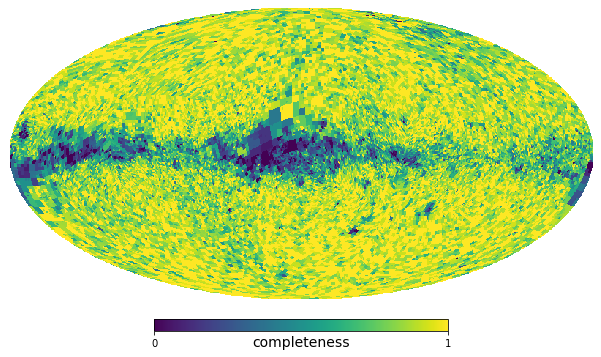

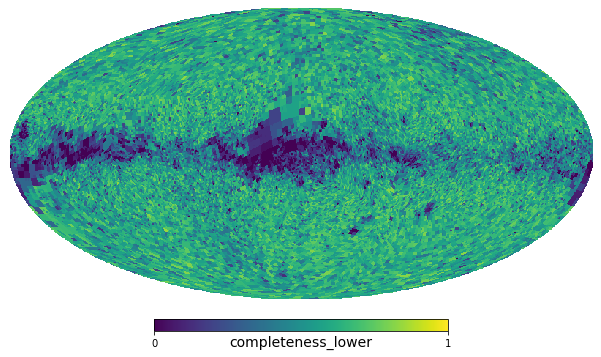

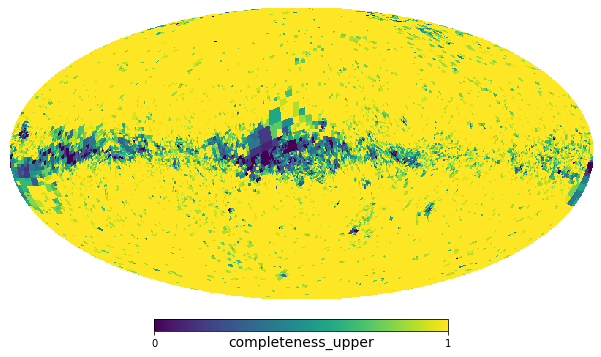

In [4]:
# Utility function to plot the data
def plot_mollweide_linear(data, unit):
    import healpy as hp
    import matplotlib.pylab as plt

    map_mollweide = data
    hp.mollview(map_mollweide, cbar = True, nest = True, coord= "CG", unit = unit,notext =True, title = '',min = 0,max = 1)
    plt.show()

# Plotting the queried data
print('These all sky maps show the selection function for G = 12.5 mag and GRP = 12.0 mag')
plot_mollweide_linear(completeness,'completeness')
plot_mollweide_linear(completeness_lower,'completeness_lower')
plot_mollweide_linear(completeness_upper,'completeness_upper')

grvs=  10.836682648000002  grp= 1.1999999999999993


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


These all sky maps show the selection function for G = 12.6 mag and GRP = 11.4 mag


/home/rybizki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


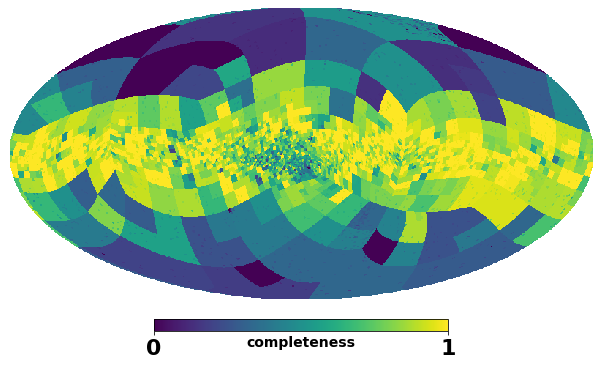

/home/rybizki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in true_divide
/home/rybizki/anaconda3/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/home/rybizki/anaconda3/lib/python3.7/site-packages/healpy/projaxes.py:1184: RuntimeWarning: invalid value encountered in less
  result.data[result.data < 0] = 0.0
/home/rybizki/anaconda3/lib/python3.7/site-packages/healpy/projaxes.py:1185: RuntimeWarning: invalid value encountered in greater
  result.data[result.data > 1] = 1.0
/home/rybizki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


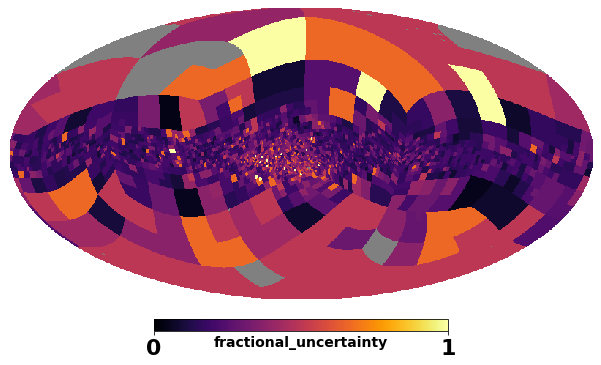

/home/rybizki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


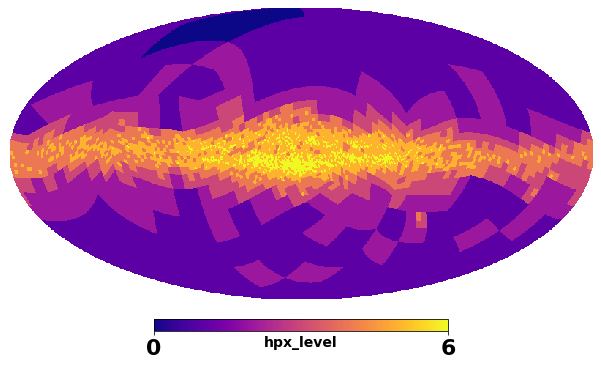

In [5]:
# Paper plots
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

# Preparing an array of gmags, grpmags and galactic longitudes and latitudes
l = np.zeros(49152)
b = np.zeros_like(l)
gmag = 12.6 * np.ones_like(l)
grpmag = 11.4 * np.ones_like(l)

# The selection function is internally converting G and GRP to GRVS using this function for sources bluer than G-GRP = 1.4:
grp = gmag[0]-grpmag[0]
if grp > 1.4:
    grvs = dr2.grvs_for_red_sources(gmag[0],grpmag[0])
else:    
    grvs = dr2.grvs_for_blue_sources(gmag[0],grpmag[0])
print('grvs= ',grvs, ' grp=',grp)

# A utility function that calculates l and b values from level 6 HEALpix numbers 
l,b = dr2.hpx2lb(np.arange(49152))


# RVS selection function initialisation,
# from_rp_to_g_completeness is just added ontop without using the same HEALpix averaging 
t = dr2.rvs_selection_function(from_rp_to_g_completeness=True)

# Querying the selection function
completeness, completeness_lower = t.query_array(gmag,grpmag,l,b, extra = 'completeness_lower')
completeness, completeness_upper = t.query_array(gmag,grpmag,l,b, extra = 'completeness_upper')
completeness, hpx_level = t.query_array(gmag,grpmag,l,b, extra = 'hpx_level')


# Utility function to plot the data
def plot_mollweide_linear(data, unit):
    import healpy as hp
    import matplotlib.pylab as plt

    map_mollweide = data
    hp.mollview(map_mollweide, cbar = True, nest = True, coord= "CG", unit = unit,notext =True, 
                title = '',min = 0,max = 1)
    plt.tight_layout()
    plt.savefig('sf.png', dpi = 150)
    plt.show()

def plot_mollweide_linear_uncertainty(data, unit):
    import healpy as hp
    import matplotlib.pylab as plt

    map_mollweide = data
    hp.mollview(map_mollweide, cbar = True, nest = True, coord= "CG", unit = unit,
                notext =True, title = '',min = 0,max = 1, cmap = plt.get_cmap('inferno'))
    plt.tight_layout()
    plt.savefig('sf_unc.png', dpi = 150)
    plt.show()
    

def plot_mollweide_linear_hpx_level(data, unit):
    import healpy as hp
    import matplotlib.pylab as plt

    map_mollweide = data
    hp.mollview(map_mollweide, cbar = True, nest = True, coord= "CG", unit = unit,
                notext =True, title = '',min = 0,max = 6, cmap = plt.get_cmap('plasma'))
    plt.tight_layout()
    plt.savefig('sf_hpx.png', dpi = 150)
    plt.show()
    
# Plotting the queried data
print('These all sky maps show the selection function for G = %.1f mag and GRP = %.1f mag' %(gmag[0],grpmag[0]))
plot_mollweide_linear(completeness,'completeness')
plot_mollweide_linear_uncertainty(np.divide(np.divide(completeness_upper-completeness_lower,2),completeness), 'fractional_uncertainty')
plot_mollweide_linear_hpx_level(hpx_level, 'hpx_level')
#plot_mollweide_linear(completeness_lower,'completeness_lower')
#äplot_mollweide_linear(completeness_upper,'completeness_upper')

In [6]:
# This gives us the G_RVS magnitude and G-GRP color from G and GRP 
gmag = 12.6
grpmag = 11.4

# The selection function is internally converting G and GRP to GRVS using this function for sources bluer than G-GRP = 1.4:
grp = gmag-grpmag
grvs = dr2.grvs_from_g_grp(gmag,grpmag)
print('grvs= ',grvs, ' grp=',grp)

grvs=  10.836682648000002  grp= 1.1999999999999993


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
/home/rybizki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


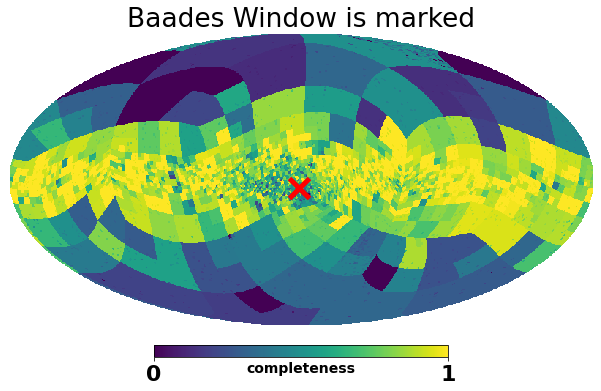

color grid of the selection function (g-grp)
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7]
magnitude grid of the selection function (grvs)
[ 3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6
  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4
  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.  11.2
 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8 14. ]


In [7]:
#Baades Window plotting
l = 1.0
b = -3.9

# Utility function to plot the data
def plot_mollweide_linear(data, unit):
    import healpy as hp
    import matplotlib.pylab as plt

    map_mollweide = data
    hp.mollview(map_mollweide, cbar = True, nest = True, coord= "CG", unit = unit,notext =True, 
                title = 'Baades Window is marked',min = 0,max = 1)
    projplot(l,b,'rx', ms = 20,mew = 5,lonlat = True,coord = 'G')
    plt.tight_layout()
    plt.show()
plot_mollweide_linear(completeness,'completeness')

# Extracting the CMD grid

t = dr2.rvs_selection_function(from_rp_to_g_completeness=False)
completeness, rvsmag_bins = t.query(gmag,grpmag,l,b, extra = 'rvsmag_bins')
completeness, col_bins = t.query(gmag,grpmag,l,b, extra = 'col_bins')

ncmdgrid = len(rvsmag_bins)*len(col_bins)
print('color grid of the selection function (g-grp)')
print(col_bins)
print('magnitude grid of the selection function (grvs)')
print(rvsmag_bins)

# Preparing the gmag and grpmag array

gmag = np.zeros(shape=(len(col_bins),len(rvsmag_bins)))
grpmag = np.zeros(shape=(len(col_bins),len(rvsmag_bins)))

for i,col in enumerate(col_bins):
    for j,rvsmag in enumerate(rvsmag_bins):
        gmag[i,j],grpmag[i,j] = dr2.g_grp4specific_grvs_color(rvsmag,col)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


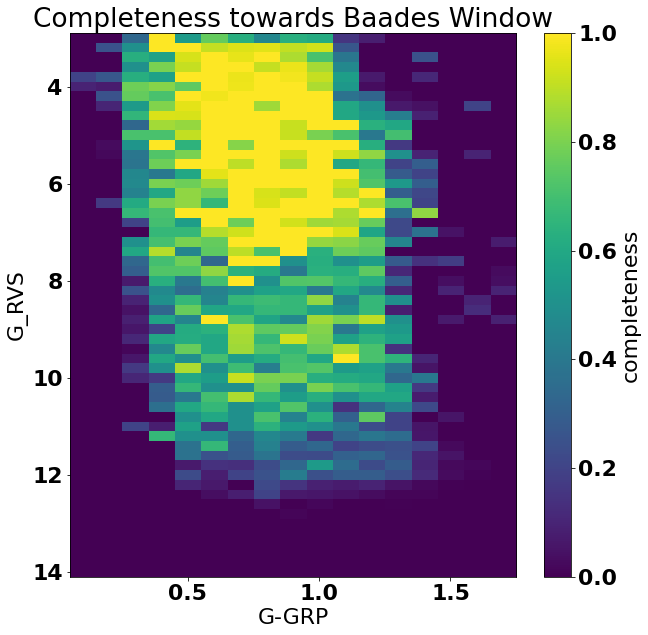

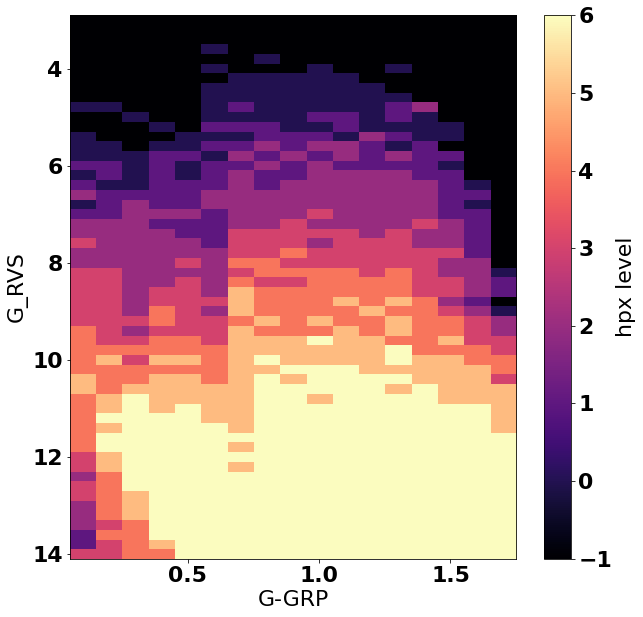

<Figure size 432x288 with 0 Axes>

In [8]:
# Preparing an array of gmags, grpmags and galactic longitudes and latitudes
l = np.ones(ncmdgrid) * 1.0
b = np.ones(ncmdgrid) * -3.9
# Storing the shape to restore the CMD
old_shape = gmag.shape
gmag = np.ravel(gmag)
grpmag = np.ravel(grpmag)

# TODO: There is a bug in the rp_to_g_completeness which destroys the averaged pixels
t = dr2.rvs_selection_function(from_rp_to_g_completeness=False)

# Querying the selection function
completeness, hpx_level = t.query_array(gmag,grpmag,l,b, extra = 'hpx_level')

completeness = np.reshape(completeness,old_shape)
hpx_level = np.reshape(hpx_level,old_shape)


# Plotting the completeness CMD in Baades Window

col_step = col_bins[1]-col_bins[0]
left = col_bins[0] - col_step*0.5
right = col_bins[-1] + col_step*0.5
mag_step = rvsmag_bins[1]-rvsmag_bins[0]
bottom = rvsmag_bins[-1] + mag_step*0.5
top = rvsmag_bins[0] - mag_step*0.5
plt.figure(figsize=(10,10))
plt.title('Completeness towards Baades Window')
plt.imshow(completeness.T, aspect = 'auto',extent = (left, right, bottom, top))
plt.xlabel('G-GRP')
plt.ylabel('G_RVS')
plt.colorbar(label = 'completeness')

# Plotting healpix level over which was averaged
plt.figure(figsize=(10,10))
plt.imshow(hpx_level.T, aspect = 'auto',extent = (left, right, bottom, top), cmap = plt.get_cmap('magma'))
plt.xlabel('G-GRP')
plt.ylabel('G_RVS')
plt.colorbar(label = 'hpx level')
plt.show()
plt.clf()

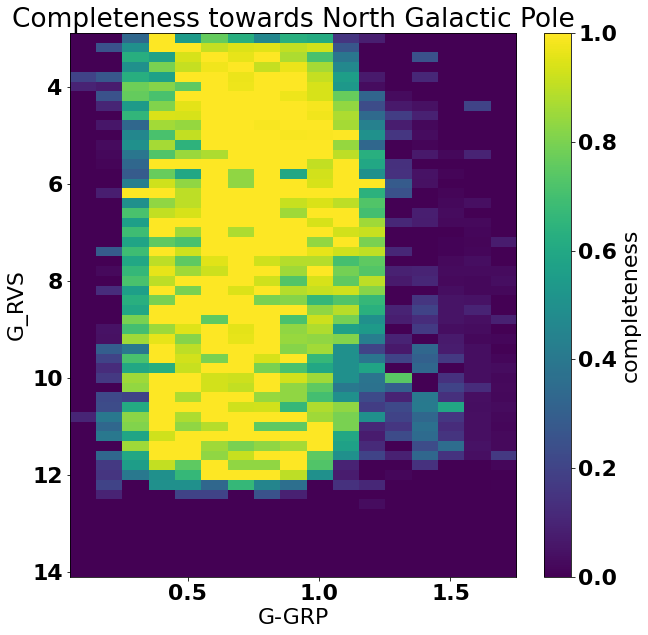

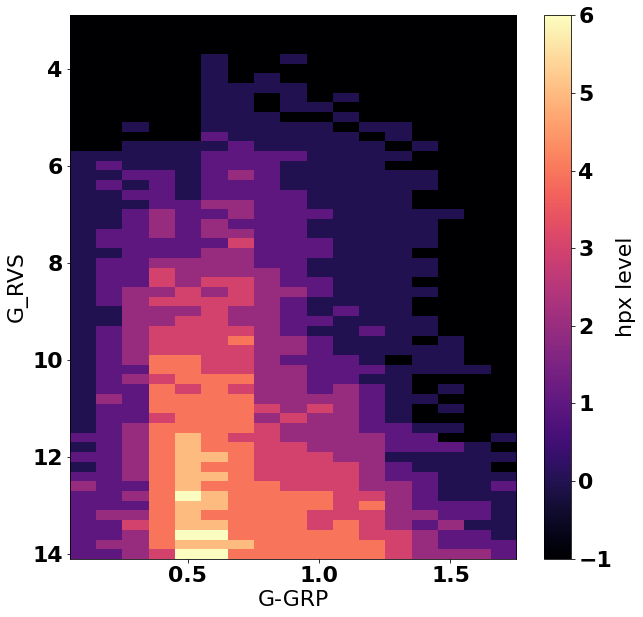

<Figure size 432x288 with 0 Axes>

In [9]:
# Plotting north galactic pole

# Preparing an array of gmags, grpmags and galactic longitudes and latitudes
l = np.ones(ncmdgrid) * 1.0
b = np.ones(ncmdgrid) * 90

# TODO: There is a bug in the rp_to_g_completeness which destroys the averaged pixels
t = dr2.rvs_selection_function(from_rp_to_g_completeness=False)

# Querying the selection function
completeness, hpx_level = t.query_array(gmag,grpmag,l,b, extra = 'hpx_level')

completeness = np.reshape(completeness,old_shape)
hpx_level = np.reshape(hpx_level,old_shape)


# Plotting the completeness CMD in North Galactic pole

col_step = col_bins[1]-col_bins[0]
left = col_bins[0] - col_step*0.5
right = col_bins[-1] + col_step*0.5
mag_step = rvsmag_bins[1]-rvsmag_bins[0]
bottom = rvsmag_bins[-1] + mag_step*0.5
top = rvsmag_bins[0] - mag_step*0.5

plt.figure(figsize=(10,10))
plt.title('Completeness towards North Galactic Pole')
plt.imshow(completeness.T, aspect = 'auto',extent = (left, right, bottom, top))
plt.xlabel('G-GRP')
plt.ylabel('G_RVS')
plt.colorbar(label = 'completeness')

# Plotting healpix level over which was averaged
plt.figure(figsize=(10,10))
plt.imshow(hpx_level.T, aspect = 'auto',extent = (left, right, bottom, top), cmap = plt.get_cmap('magma'))
plt.xlabel('G-GRP')
plt.ylabel('G_RVS')
plt.colorbar(label = 'hpx level')
plt.show()
plt.clf()